<a href="https://colab.research.google.com/github/monjjjjj/Iris-Classification/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy
import pandas
import keras
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras import initializers, optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [85]:
#load data
col_name = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class']
dataframe = pandas.read_csv("iris.csv", names=col_name)
dataset = dataframe.values
x = dataset[:,0:4].astype('float32')
y = dataset[:,4]
#train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=0)
print(x.shape)
print(y.shape)
#print(len(x))
#print(train_x)
#print(len(train_x))
#print(y)
print(dataset.shape)
print(dataframe.head())

(150, 4)
(150,)
(150, 5)
   sepal-lenght  sepal-width  petal-lenght  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


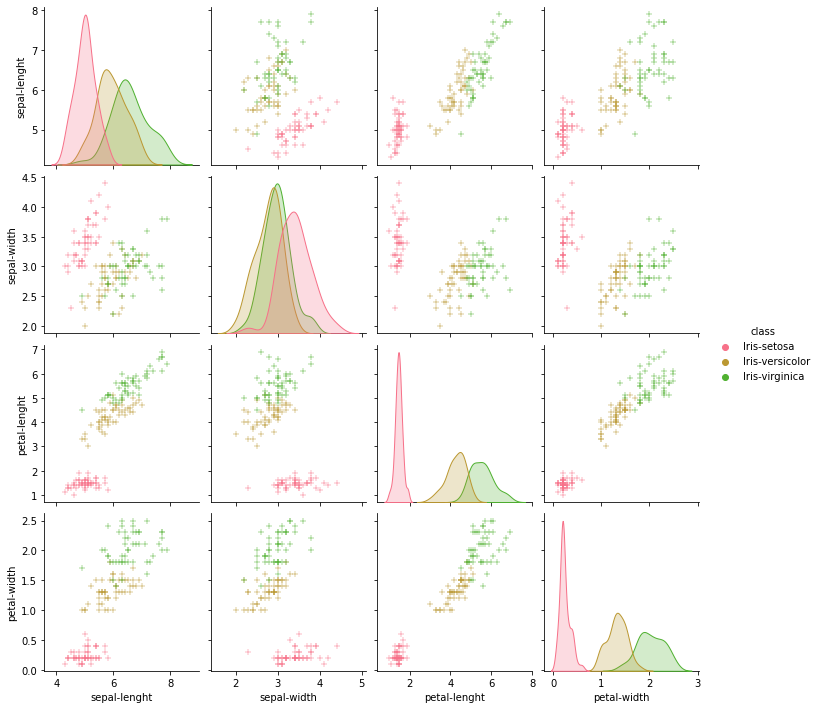

In [86]:
#pair_plot
sns.pairplot(dataframe, hue='class', markers='+')
plt.show()
#From the below, we can see that Iris-Setosa is separated from both other species in all the features.

In [87]:
#fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

In [88]:
#encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
#print(encoded_y) 

#convert integers to one-hot vector and split the data
one_hot_y = np_utils.to_categorical(encoded_y,3)
train_x, test_x, train_y, test_y = train_test_split(x, one_hot_y, train_size=0.8, test_size=0.2, random_state=0)

In [89]:
#4 inputs: sepal_length, sepal_width, petal_length, petal_width
#3 outputs: Iris Setosa[1, 0, 0], Versicolor[0, 1, 0], or Virginica[0, 0, 1]
def baseline_model():
  init = keras.initializers.glorot_uniform(seed)
  adam = tf.keras.optimizers.Adam()
  model = Sequential()
 
  #model.add(Conv1D(32, 3, activation='relu')(x.shape))
  #model.add(MaxPooling1D(2,data_format='channels_first'))
  #model.add(BatchNormalization())
  

  model.add(Dense(5, kernel_initializer=init, input_dim=4, activation='relu'))
  model.add(Dense(6, kernel_initializer=init, activation='relu'))
  model.add(Dense(3, kernel_initializer=init, activation='softmax'))

  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
  print(model.summary())
  return model

In [90]:
#training
model = baseline_model()
train_history = model.fit(train_x,train_y, validation_split=0.2, epochs=100, batch_size=2, verbose=0)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 25        
                                                                 
 dense_16 (Dense)            (None, 6)                 36        
                                                                 
 dense_17 (Dense)            (None, 3)                 21        
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
#k-fold cross validation
'''kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(train_history, x, one_hot_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))'''

'kfold = KFold(n_splits=10, shuffle=True, random_state=seed)\nresults = cross_val_score(train_history, x, one_hot_y, cv=kfold)\nprint("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))'

In [92]:
#show training history
def show_train_history(train_history,train,validation):
  
  if train == 'accuracy':
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
  else:
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

  plt.legend(['train','validation'],loc='upper left')
  plt.show()

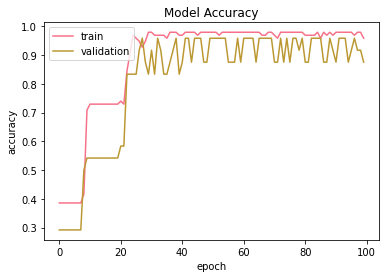

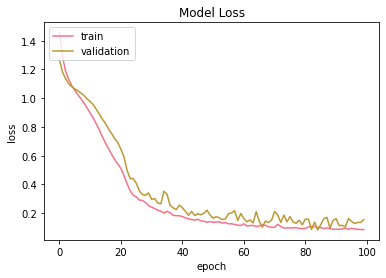

In [93]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [94]:
#evaluation
eval = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%% " % (eval[1]*100))
#print("Evaluation on test data: loss = %0.6f%% acurracy = %0.2f%% \n") % (eval[0]*100, eval[1] * 100)

Accuracy: 100.00% 
